# [Kaggle Titanic Survival prediction](https://www.kaggle.com/c/titanic)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from time import time

sns.set(style="ticks", rc={'figure.figsize':(7,6)})
sns.set_context(rc = {"font.size":15, "axes.labelsize":15}, font_scale=2)
sns.set_palette('colorblind');
from pandas.api.types import CategoricalDtype
# pandas defaults
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
np.set_printoptions(precision=4)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

import warnings
warnings.filterwarnings('ignore')

from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

Here as we have to predict whether the passenger has survived or not __(0 - Did not survive and 1 - Survived)__. So it is a classification problem.

## Importing training and test set data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print("train shape: ", train.shape)
print("test shape: ", test.shape)

train shape:  (891, 12)
test shape:  (418, 11)


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,NaN,S


In [4]:
train.loc[:,'train_or_test'] = 'train'
test.loc[:,'train_or_test'] = 'test'
test.loc[:,'Survived'] = np.nan

Concatenate train and test set to a single dataset after excluding the target column from train dataset.

In [5]:
data = pd.concat([train.loc[:,train.columns != 'Survived'], test], ignore_index = True)
data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_or_test,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S,train,nan
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,71.2833,C85,C,train,nan
2,3,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S,train,nan
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S,train,nan
4,5,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,NaN,S,train,nan


Dropping __PassengerId__ column from the data table.

In [6]:
data.drop(columns = ['PassengerId'], inplace = True)
# train.drop(columns = ['PassengerId'], inplace = True)
data.shape

(1309, 12)

In [7]:
data['train_or_test'].value_counts()

train    891
test     418
Name: train_or_test, dtype: int64

## Data Wrangling

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         1309 non-null   int64  
 1   Name           1309 non-null   object 
 2   Sex            1309 non-null   object 
 3   Age            1046 non-null   float64
 4   SibSp          1309 non-null   int64  
 5   Parch          1309 non-null   int64  
 6   Ticket         1309 non-null   object 
 7   Fare           1308 non-null   float64
 8   Cabin          295 non-null    object 
 9   Embarked       1307 non-null   object 
 10  train_or_test  1309 non-null   object 
 11  Survived       0 non-null      float64
dtypes: float64(3), int64(3), object(6)
memory usage: 122.8+ KB


## EDA on the dataset

### Univariate analysis

#### 1. Survived - target column

In [9]:
data.loc[data['train_or_test']=='train','Survived'].value_counts()

Series([], Name: Survived, dtype: int64)

IndexError: index 0 is out of bounds for axis 0 with size 0

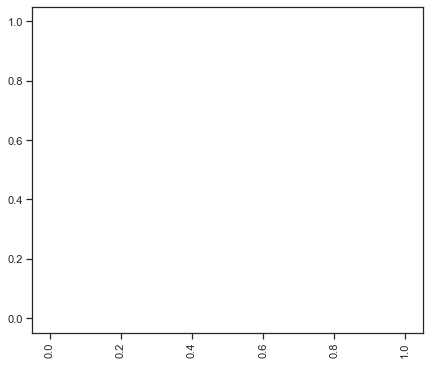

In [10]:
data.loc[data['train_or_test']=='train','Survived'].value_counts().plot(kind = 'bar');
plt.title('Barplot of count of surviors');
plt.xlabel('Survived');
plt.ylabel('Count');

#### 2. Pclass


In [ ]:
data['Pclass'].nunique()

In [ ]:
data['Pclass'].unique()

In [ ]:
data['Pclass'].value_counts().plot(kind = 'bar');

So most of the passenegers were in the 3rd class.

Checking the survival status of passengers from the different passeneger classes. 

#### 3. Sex

In [ ]:
data['Sex'].value_counts().plot(kind = 'bar');
plt.ylabel('Count');
plt.title('Count based on gender');

#### 4. Age

In [ ]:
data['Age'].min(), data['Age'].max()

In [ ]:
data['Age'].describe()

In [ ]:
# Cut the window in 2 parts
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add a graph in each part
sns.boxplot(data['Age'], ax = ax_box)
sns.distplot(data['Age'], ax = ax_hist, kde = False, bins = [0, 17, 40, 60, 85])

# Remove x axis name for the boxplot
ax_box.set(xlabel='');
sns.despine(ax=ax_hist);
sns.despine(ax=ax_box, left=True);

#### 5. Embarked

In [ ]:
data['Embarked'].value_counts(dropna = False)

In [ ]:
data['Embarked'].value_counts(dropna = False).plot(kind = 'barh');

#### 6. Fare

In [ ]:
data['Fare'].describe()

In [ ]:
sns.distplot(data['Fare'], kde = False, bins = [0,50, 100, 200, 520]);

In [ ]:
def boxplot_and_histogram_plot(ser):
    # Cut the window in 2 parts
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    # Add a graph in each part
    sns.boxplot(ser, ax = ax_box)
    sns.distplot(ser, ax = ax_hist)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel='');
    sns.despine(ax=ax_hist);
    sns.despine(ax=ax_box, left=True);

In [ ]:
boxplot_and_histogram_plot(data['Fare']);

In [ ]:
data['Fare'].max()

In [ ]:
data['Fare'].skew()

In [ ]:
data['Fare'].kurt()

In [ ]:
# Prerequisite before boxcox transform array must not have NaNs - dealing with null values after EDA

# feature = boxcox1p(data['Fare'], boxcox_normmax(data['Fare'] + 1))
# boxplot_and_histogram_plot(feature)

#### 7. sibsp 
Number of siblings / spouses aboard the Titanic

In [ ]:
data['SibSp'].value_counts().plot(kind = 'barh');

So more people having 1 or no siblings/spouses onboard.

#### 8. parch
Number of parents / children aboard the Titanic

In [ ]:
data['Parch'].value_counts().plot(kind = 'barh');

So most of the people onboard did not have their parents/children onboard with them.

#### 9. Cabin

As we observed in our initial analysis the Cabin columns majority values are null so I modified the variable as people having Cabin onboard and those dont having cabin.

In [ ]:
data.loc[data['Cabin'].isnull(),'Cabin'] = 0
data.loc[data['Cabin']!=0,'Cabin'] = 1

data['Cabin'].value_counts()

In [ ]:
data['Cabin'] = data['Cabin'].astype(bool)

In [ ]:
data['Cabin'].value_counts().plot(kind = 'barh');

#### 10. Name

In [ ]:
data['Name'].str.split(',')[:7]

In [ ]:
data['Title'] = data['Name'].str.split(',').apply(lambda x:x[1].split('.')[0].strip())

In [ ]:
data['Title'].unique()

In [ ]:
data.head()

In [ ]:
data['Title'].value_counts(dropna = False)

In [ ]:
data['Title'].replace(to_replace = ['Don', 'Rev', 'Dr', 'Major', 'Col', 'Capt', 'Jonkheer', 'Sir'], value = 'Honorary(Male)',
                     inplace = True)

data['Title'].replace(to_replace = ['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], value = 'Honorary(Female)',
                     inplace = True)

In [ ]:
data['Title'].value_counts(dropna = False)

In [ ]:
(pd.concat([data.loc[data['train_or_test']=='train', ['Title']], Y], axis = 1).groupby(['Title','Survived']).
agg({'Survived':'count'}))

So most of the people who survived were Miss, Mrs and Master

# Imputing Missing value

#### Age

- Replacing the Age columns null values with the median value.
- Now as the Age columns shows the actual values so the outliers shown are correct here so I thought the best way to handle them is by rescaling the Age column vales but this gives a distribution where values are limited between the IQR range and the distribution becomes tri-modal distribution.

In [ ]:
data['Age'].fillna(data['Age'].median(), inplace = True)
data['Embarked'].fillna(data['Embarked'].value_counts().idxmax(), inplace = True)
data['Fare'].fillna(data['Fare'].median(), inplace = True)

## Dropping name columns

In [ ]:
data.drop(columns = 'Name', inplace=True)

## Bivariate analysis

1. Continuous and continuous
2. Categorical and categorical
3. Categorical and continuous


### 1. Continuous and Continuous

#### Age and fare

In [ ]:
sns.jointplot(x='Age',y='Fare',data=data,kind='kde');

So,most of the people in the Titanic were in the age groups of 20 to 40 with Fare between 0 to 100.


In [ ]:
data['Age'].corr(data['Fare'])

Also, there is no correlation between Age and fare.

### 2. Continuous and categorical

#### Age and Survived

In [ ]:
fig,ax = plt.subplots()
sns.distplot(train.loc[train['Survived']== 1,'Age'], kde = True, hist=True, ax = ax, label = 'Survived', color="g");
sns.distplot(train.loc[train['Survived']== 0, 'Age'], kde = True, hist=True, ax = ax, label = 'Not Survived', color="r");
plt.legend();
plt.show();

So, people having lower ages have higher chances of survival.

#### fare and Survived

In [ ]:
fig,ax = plt.subplots()
sns.distplot(train.loc[train['Survived']== 1,'Fare'], kde = True, hist=True, ax = ax, label = 'Survived', color="g");
sns.distplot(train.loc[train['Survived']== 0, 'Fare'], kde = True, hist=True, ax = ax, label = 'Not Survived', color="r");
plt.legend();
plt.show();

## Outlier detection

In [ ]:
from ml_functions import detect_outliers

In [ ]:
# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(data[data['train_or_test']=='train'],2,["Age","SibSp","Parch","Fare"])

In [ ]:
data.loc[Outliers_to_drop] # Show the outliers rows

### Dropping rows having outliers

In [ ]:
data = data.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

### Deleting column - Ticket

In [ ]:
data.drop(columns = 'Ticket', inplace = True)

In [ ]:
data.head(5)

### Categorical and categorical

#### 1. Pclass and survived

In [ ]:
temp = (data.loc[data['train_']=='train', ['Pclass', 'Survived']].groupby('Pclass')
 .apply(lambda gd: gd['Survived'].value_counts(normalize = True))).reset_index()

temp.columns = ['Pclass', 'Survived', 'Count']
temp

So from the above normalized count we can infer that the passengers in the 1st class had a better chance of Survival than the 2nd and 3rd class. We can treat the Pclass as a categorical column with 1 having higher value than 2 and 3.

In [ ]:
cat_type = CategoricalDtype(categories = [3,2,1], ordered = True)
data['Pclass'] = data['Pclass'].astype(cat_type)

In [ ]:
data['Pclass'].unique()

Finding association between Pclass and Survived

In [ ]:
from ml_functions import cramers_v

In [ ]:
sns.countplot(data = train, x = 'Pclass', hue = 'Survived');

It can be seen that Pclass 3 had the maximum count of people who did not survive.

#### 2. Gender and survived
To see the gender of the passenegers who survived.

In [ ]:
sns.catplot(data = train, x = 'Pclass', hue = 'Sex', col = 'Survived', kind = 'count');

So from the graph we can infer that the female passenegers survival chances were more than that of male passenegrs irrespective of the Pclass.

#### 3. Embarked and survived

In [ ]:
sns.countplot(data = train, x = 'Embarked', hue = 'Survived');

#### 4. Pclass and Fare

In [ ]:
# total Fare received from each class
data.groupby(['Pclass'])['Fare'].sum().plot(kind = 'barh');

In [ ]:
sns.catplot(data = train, x = 'Embarked', col = 'Survived', hue = 'Sex', kind = 'count')

In [ ]:
sns.catplot(data = train, x = 'Embarked', hue = 'Pclass', col = 'Sex', kind = 'count');

So the total fare given by the passengers in Pclass 3 is less than the total fare given by Pclass 1 passengers even though more number of people were in Pclass 3.

In [ ]:
sns.barplot(data = train, x = 'Pclass', y = 'Fare', hue = 'Survived', ci = None)

In [ ]:
sns.countplot(data = train, x = 'SibSp', hue = 'Survived')

In [ ]:
train.groupby('SibSp')['Survived'].value_counts(normalize = True)*100

So there is a bit of impact of people who survived based on the presence of Siblings/Spouses on-board the titanic.

In [ ]:
sns.countplot(data = train, x = 'Parch', hue = 'Survived');
plt.legend(loc = 'upper right');

In [ ]:
sns.countplot(data = train, x = 'Cabin', hue = 'Survived');
plt.legend(loc = 'upper right');

In [ ]:
sns.catplot(data = train, x = 'Cabin', col = 'Survived', hue = 'Sex', kind = 'count')

So, it can be seen from the categorical plot above that those people having cabins and that too women have better chances of survival.

In [ ]:
# data.drop(columns = ['Name', 'Ticket'], inplace = True)
# train.drop(columns = ['Name', 'Ticket'], inplace = True)
# data.shape

### train and test dataset

In [ ]:
# test = data.iloc[len(train):,:].copy()
# print(test.shape)
# test.head()

In [ ]:
# X = train.loc[:, train.columns!= 'Survived'].copy()
# y = train['Survived'].copy()
# X.head()

## Modelling

In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
# from sklearn.pipeline import Pipeline

# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold

### Baseline model - Decision tree

Based on the cross validation done, i found that at folds = 3 we have lower value of variance = 0.000353 and f1-score = 0.717 so this can be the best model

| folds | f1-score | variance |
|-------|----------|----------|
| 3     | 0.717    | 0.000353 |
| 5     | 0.713    | 0.000609 |
| 10    | 0.716    | 0.003447 |

In [ ]:
# from sklearn.tree import DecisionTreeClassifier

# # Setup cross validation folds
# skf = StratifiedKFold(n_splits = 5, random_state = 0, shuffle=True)

# dt_clf = DecisionTreeClassifier(random_state=0)

# colT = ColumnTransformer([
#     ('categ_encod', OneHotEncoder(drop = 'first'), ['Sex', 'Embarked']),
# ], remainder = 'passthrough')

# dt_pipeline = Pipeline(steps = [('colt', colT), ("dt", dt_clf)])
# param_grid = {"dt__max_depth": [2,3,4,5,6],
#               "dt__max_features": [None, 'auto', 'sqrt', 'log2'],
#               "dt__criterion": ["gini", "entropy"],
#               "dt__min_samples_split": range(5,10)}

# grid = GridSearchCV(dt_pipeline, param_grid, verbose = 0, cv = skf, scoring = 'f1')

# t0 = time()
# grid.fit(X,y)
# print("training time: ", round(time()-t0, 3), "s", sep = '')

# scores = cross_val_score(grid, X, y, cv = skf, scoring = 'f1')
# print('f1-scores: ',scores)
# print("f1-score variance of splits: ",scores.var())
# print("Avg f1-score: ",scores.mean())

# prediction_dt = grid.predict(test)

In [ ]:
# grid.best_score_

In [ ]:
# grid.best_params_

In [ ]:
# test2 = pd.read_csv('test.csv')

# df_output = pd.DataFrame()
# df_output['PassengerId'] = test2['PassengerId']
# df_output['Survived'] = prediction_dt
# print(df_output.shape)
# df_output.head()

In [ ]:
# df_output.to_csv('submission.csv', index = False)